# Project1_Explore Weather Trends

**・Using Python to analyze the weather trends**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**・Extract data using SQL and download in csv**

    SELECT a.year, 
           a.avg_temp AS avg_temp_tokyo, 
           b.avg_temp as avg_temp_global 
    FROM city_data AS a 
    INNER JOIN global_data AS b 
    ON a.year=b.year 
    WHERE a.city='Tokyo' AND a.avg_temp IS NOT NULL AND b.avg_temp IS NOT NULL

In [2]:
df=pd.read_csv('weather_trends.csv')

In [3]:
df

,year,avg_temp_tokyo,avg_temp_global
0,1845,11.95,7.85
1,1846,12.40,8.55
2,1847,12.21,8.09
3,1848,12.14,7.98
4,1849,12.14,7.98
...,...,...,...
164,2009,13.55,9.51
165,2010,13.82,9.70
166,2011,13.32,9.52
167,2012,13.11,9.51


In [4]:
df.shape

(169, 3)

**・Calculate Moving Averages by the temperature in last 10 years**

In [5]:
for n in range(9,169):
    df.loc[n,'avg_temp_tokyo']=np.mean(df.avg_temp_tokyo[n-9:n+1])
    df.loc[n,'avg_temp_global']=np.mean(df.avg_temp_global[n-9:n+1])
    n+=1

In [6]:
df_ma=df.iloc[9:].reset_index(drop=True)

In [7]:
df_ma

,year,avg_temp_tokyo,avg_temp_global
0,1854,12.014000,8.088000
1,1855,12.052400,8.101800
2,1856,11.967640,8.045980
3,1857,11.931404,8.017578
4,1858,11.939544,8.055336
...,...,...,...
155,2009,12.882625,8.873762
156,2010,12.920673,8.907925
157,2011,12.888111,8.905552
158,2012,12.877239,8.916962


**・Line Plot**

**・key considerations on deciding how to visualize the trends**
    
    ・Adding both lines of global and Tokyo in one plot for visualization
    ・Adding the linear equation to clarify the temperature changes by checking the slope

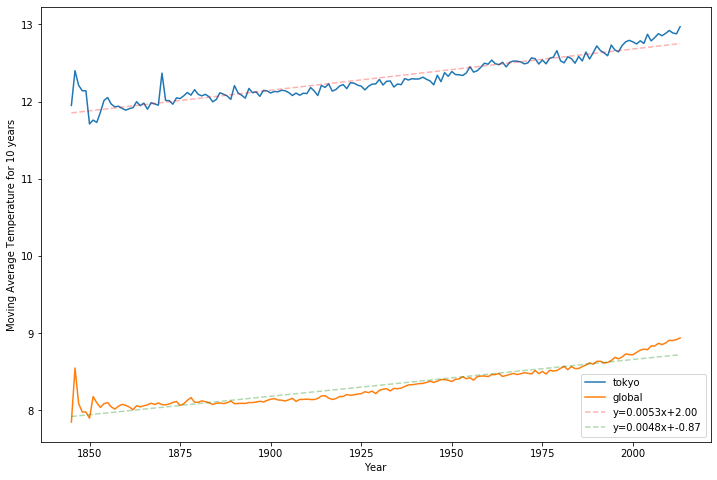

In [8]:
plt.figure(figsize=(12,8))
#plot moving averages
plt.plot(df['year'],df['avg_temp_tokyo'],label='tokyo')
plt.plot(df['year'],df['avg_temp_global'],label='global')

#linear equation
m_tokyo, b_tokyo = np.polyfit(df['year'], df['avg_temp_tokyo'], 1)
plt.plot(df['year'], m_tokyo*df['year'] + b_tokyo, linestyle='--', alpha=0.3, color='r',label='y={:.4f}x+{:.2f}'.format(m_tokyo,b_tokyo))
m_global, b_global = np.polyfit(df['year'], df['avg_temp_global'], 1)
plt.plot(df['year'], m_global*df['year'] + b_global, linestyle='--', alpha=0.3, color='g',label='y={:.4f}x+{:.2f}'.format(m_global,b_global))

#add label
plt.xlabel('Year')
plt.ylabel('Moving Average Temperature for 10 years')

plt.legend()
plt.show()

**・Observations**

    ・Tokyo is about 4 degrees hotter on average compared to the global average. The difference has been consistent over time.
    ・Both the changes in average temperatures of Tokyo and global are in upward trends.
    ・As shown in the slope of the linear equation, the slope of Tokyo is higher than the one of global, which means the average    temperature changes in Tokyo is slightly higher compare to global.
    ・The upward trend for global and Tokyo temperature changes has been consistent over the last hundred years, and it's getting serious especially since 1990s.